In [59]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from pprint import pprint
import importlib
import utils_markov
import utils_threshold
import utils_rounding

# Markov Model

In [61]:
datain = pd.read_csv("datasets/csv1.csv")
datain['Date'] = pd.to_datetime(datain['Date'])
datalist = datain['Value'].to_numpy()
dsize = datalist.size
dsize

551

In [63]:
importlib.reload(utils_threshold)

# discretize the state space
thresholds = utils_rounding.rounding_thresholds(datalist, 1)

markov, observed_states, states_dict, bounds = utils_threshold.avg_markov_from_data(1000, datalist, thresholds, 
                                                                            noise_mean=0, noise_variance=0)

In [64]:
map_func = lambda x: np.average(bounds[x], axis=-1)

# Predict one point ahead from observed data & compare

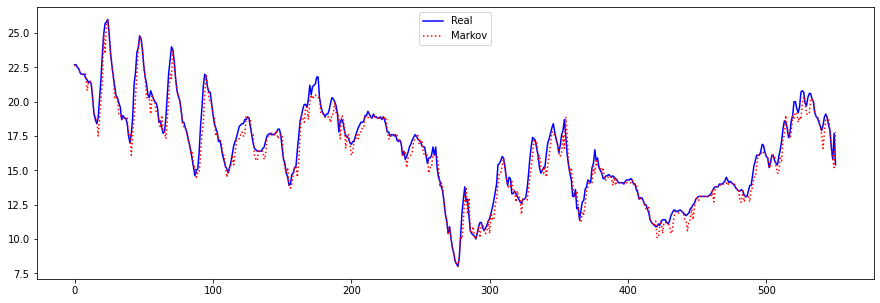

In [65]:
x_axis = np.arange(dsize)
modeled = datalist[:1]
# predicted = observed_states[:-1].tolist()

for x in x_axis[:-1]:
    # get the previous state from observed_states
    last_state = observed_states[x]
    next_state = np.argmax(markov[last_state])
    # predict, transform state to real value (avg of end point)
    prediction = map_func(next_state)
    modeled = np.concatenate([modeled, np.array([prediction])])

plt.figure(figsize=(15,5))
plt.plot(x_axis, datalist, color="b", label="Real")
plt.plot(x_axis, modeled, color="r", linestyle="dotted", label="Markov")
plt.legend(loc=9)

# Random walks on Markov Graph

show one random walk in the future + its log-probability (not pure probability to avoid underflow)

CPU times: total: 44.9 s
Wall time: 45.6 s


(750.0, 880.0)

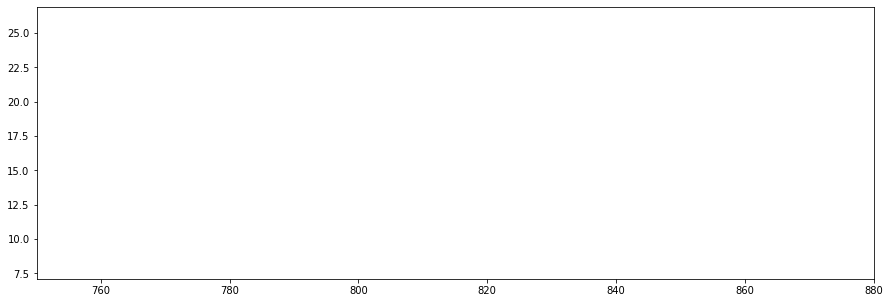

In [66]:
%%time
ahead = 100
future_x = np.arange(dsize-1, dsize + ahead)
myfig = plt.figure(figsize=(15,5))
plt.plot(x_axis, datalist, color="b")
for i in range(10000):
    walk = utils_markov.random_walk_weighted(ahead, markov, observed_states)
    plt.plot(future_x, map_func(walk['path']), color="r", linestyle='solid', alpha=0.002)
plt.xlim(750, 880)
# plt.ylim(0.5,4.0)